# End-to-End Bulldozer price prediction project

## 1. Problem Definition
We have to predict the future price of bulldozers with the data given.

## 2. Data
We will use the following dataset from kaggle:
https://www.kaggle.com/c/bluebook-for-bulldozers
The data for this competition is split into three parts:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

**Note**: As the purpose of machine learning model is always to minimize the errors, so in this project the goal is to minimize the RMSLE (Root Mean Squared Log Error).

## Features 
The data dictionary is given in the data folder we can see it for data dictionary.
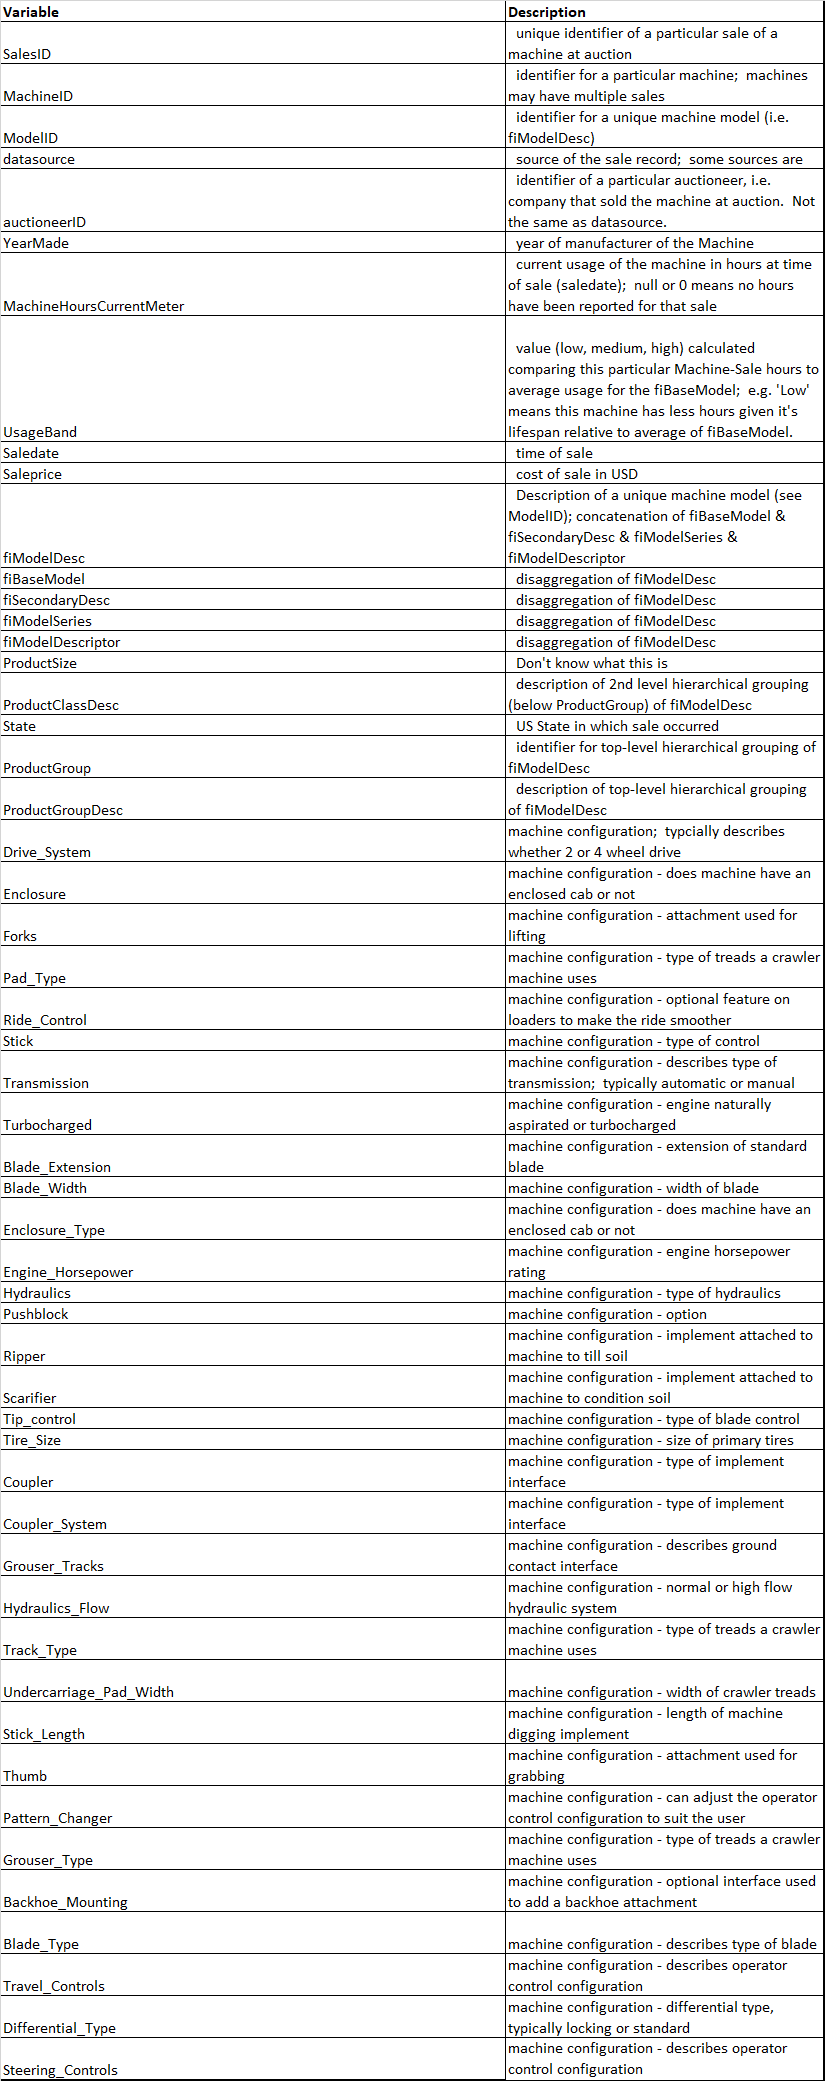

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./Pojects-datasets/bluebook-for-bulldozers/TrainAndValid.csv', low_memory = False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
# Let's check the number of null values
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [6]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

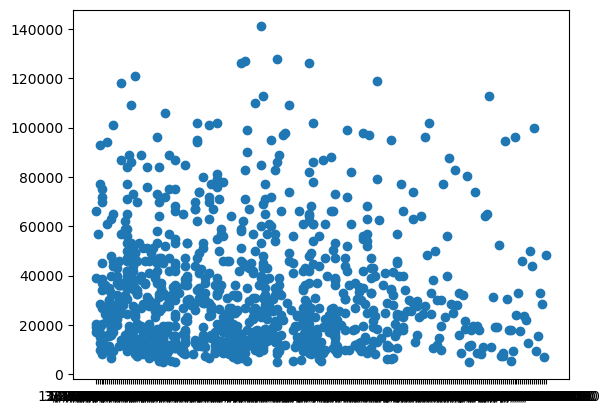

In [7]:
# As there is timeseries dataframe so we will check the price with time
fig, ax = plt.subplots()
ax = plt.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

<AxesSubplot:>

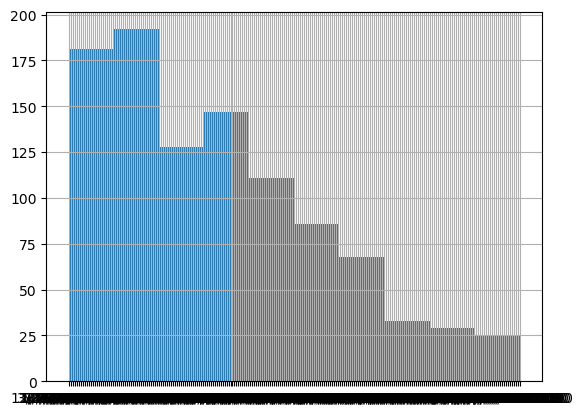

In [8]:
df.saledate[:1000].hist()

In [9]:
# As the data is in time series so we have to read the data with parsing the date
df = pd.read_csv('./Pojects-datasets/bluebook-for-bulldozers/TrainAndValid.csv', 
                 low_memory = False,
                parse_dates=['saledate'])
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

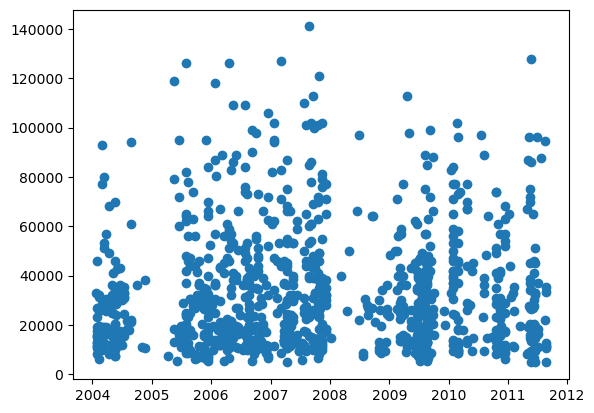

In [11]:
fig, ax = plt.subplots()
ax = plt.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

<AxesSubplot:>

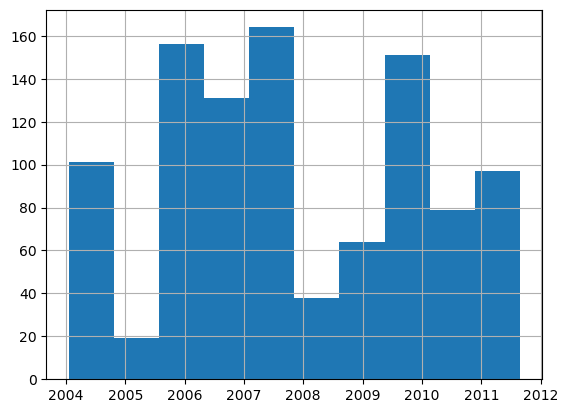

In [12]:
df['saledate'][:1000].hist()

### Sorting the df by saledate

In [13]:
df.saledate.dtype

dtype('<M8[ns]')

In [14]:
df.sort_values(by = 'saledate', ascending=True, inplace = True)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [15]:
# Making a copy of original dataframe so we can work tension free
df_temp = df.copy()

df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


# Feature Engineering
Adding or removing features.
## Now we will extract the day, month, year etc. from the saledate and will drop it.

In [16]:
df_temp['saleYear'] = df_temp['saledate'].dt.year
df_temp['saleMonth'] = df_temp['saledate'].dt.month
df_temp['saleDay'] = df_temp['saledate'].dt.day
df_temp['saleDayOfWeek'] = df_temp['saledate'].dt.dayofweek
df_temp['saleDayOfYear'] = df_temp['saledate'].dt.dayofyear

In [17]:
df_temp.head(20).T

,205615,274835,141296,212552,62755,54653,81383,204924,135376,113390,113394,116419,32138,127610,76171,127000,128130,127626,55455,55454
SalesID,1646770,1821514,1505138,1671174,1329056,1301884,1379228,1645390,1493279,1449549,1449555,1453775,1264985,1475641,1364654,1474844,1476264,1475662,1305337,1305336
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0,23500.0,31000.0,11750.0,63000.0,13000.0,10500.0,20000.0,20000.0,23500.0,14000.0,11250.0,29000.0,22000.0,17000.0,17000.0
MachineID,1126363,1194089,1473654,1327630,1336053,1182999,1082797,1527216,1363756,1289412,1102310,1514650,1204499,1194367,1270628,1279993,1245504,1242833,1517075,1236263
ModelID,8434,10150,4139,8591,4089,4123,7620,8202,2759,3356,3356,7008,6788,7277,7289,7257,7277,7277,3356,3356
datasource,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984,1976,1986,1970,1987,1966,1966,1974,1984,1973,1968,1979,1978,1973,1972,1972
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


# Now we can drop the `saledate` column

In [18]:
df_temp.drop('saledate', axis = 1, inplace = True)

In [19]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


### Now we will check and change the dtype of non_numeric data and we will use the pandas from the link below:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.api.types.is_string_dtype.html

In [20]:
pd.api.types.is_string_dtype(df_temp['UsageBand'])

True

In [21]:
# Using the for loop to see the categories of all columns
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [22]:
# Using the for loop to convert the strings into categories dtype
# Categories dtype is the dtype in which pandas assigns a numeric value to each value

for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype('category').cat.as_ordered()

In [23]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [24]:
# Now all of our data is numeric
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [25]:
# Checking which numeric values does each value gets
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [26]:
# Getting the ratio of missing values
df_temp.isna().sum()/len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [ ]:
# We can save the preprocessed dataframe as a new csv file so we can start the next steps
# df_temp.to_csv('./Pojects-datasets/Preprocessed-bluebook-for-bulldozers.csv', index = False)

In [ ]:
# Checking the preprocessed dataset
# pd.read_csv('./Pojects-datasets/Preprocessed-bluebook-for-bulldozers.csv', low_memory = False).head().T

# Fill the Missing Values

### Filling the numeric missing values

In [27]:
# Checking the numeric columns
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [28]:
# Checking the numeric columns with missing values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [29]:
# Filling the missing values with median
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column at the end of df_temp to show were the values null or not.
            df_temp[label + '_is_null'] = pd.isnull(content)
            # Filling the missing values
            df_temp[label] = content.fillna(content.median())

In [30]:
# Why median instead of mean?
# The answer is that the median is more robust than mean. Let's see in practice
hundreds = np.full((100,), 1000)
hundreds_billion = np.append(hundreds, 1000000000)

np.mean(hundreds), np.mean(hundreds_billion), np.median(hundreds), np.median(hundreds_billion)

(1000.0, 9901980.198019803, 1000.0, 1000.0)

In [31]:
# Checking is there any numeric missing value
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [32]:
# Now there is no column with missing value let's see our dataset
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,0.0,0.0,0.0,0.0,0.0
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [33]:
# Checking how much missing values were there in auctioneerID_is_null
df_temp.auctioneerID_is_null.value_counts()

False    392562
True      20136
Name: auctioneerID_is_null, dtype: int64

### Filling the categorical missing values

In [34]:
# Checking the missing categorical values
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [35]:
# Cheking which categorical values are missed
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if content.isnull().sum():
            print(label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [36]:
# Filling the missing values with categorical labels
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Making columns with binary values which will show whether there where missing values or not
        df_temp[label + '_is_missing'] = pd.isnull(content)
        # Turn categories into numbers and adding one
        df_temp[label] = pd.Categorical(content).codes+1
        # The reason of adding 1 at the last is that if there is a missing value it will return -1 so we add +1 so that there should be no negative values

In [37]:
# Real categories of state
pd.Categorical(df_temp.state).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [38]:
# Categories after converting them into numbers
pd.Categorical(df_temp.state)

[44, 9, 9, 9, 9, ..., 5, 5, 5, 5, 5]
Length: 412698
Categories (53, int64): [1, 2, 3, 4, ..., 50, 51, 52, 53]

In [39]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 81.1 MB


In [40]:
df_temp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

# Modelling

In [41]:
%%time     
# will calculate the time need for running a cell
from sklearn.ensemble import RandomForestRegressor

# Initiating our model
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

# Fitting the model
model.fit(df_temp.drop('SalePrice', axis = 1), df_temp['SalePrice'])

CPU times: total: 31min 5s
Wall time: 9min 17s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [42]:
model.score(df_temp.drop('SalePrice', axis = 1), df_temp['SalePrice'])

0.9875468079970562

Why we can't relay on the result above?

This is becuase we are scoring the data on same data on which we were training our model

Why we have to split our data into train and validation if we already have split csv files for this?

This is because we can't always relay on other people data so, we will make our own train and validation.

In [43]:
# Splitting the data into train and validation
# From the overview of dataset from kaggle we can see that the validation data starts from 2012 so will split from 2012

df_temp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [44]:
val_data = df_temp[df_temp.saleYear == 2012]
train_data = df_temp[df_temp.saleYear != 2012]

len(train_data), len(val_data)

(401125, 11573)

In [45]:
# Splitting data into X and y
X_train, y_train = train_data.drop('SalePrice', axis = 1), train_data['SalePrice']
X_val, y_val = val_data.drop('SalePrice', axis = 1), val_data['SalePrice']

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [46]:
# As our evaluation metrics was to calculate Root Mean Squared Log Error (RMSLE)
# making a custom function for calculating RMSLE
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, r2_score
def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Creating a function for other scoring metrics

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    
    scores = {'Training MAE' : mean_absolute_error(y_train, train_preds),
             'Validation MAE' : mean_absolute_error(y_val, val_preds),
             'Training RMSLE' : rmsle(y_train, train_preds),
             'Validation RMSLE' : rmsle(y_val, val_preds),
             'Training R2' : r2_score(y_train, train_preds),
             'Validation R2' : r2_score(y_val, val_preds)
             }
    return scores

## Reducing Data
It can be seen that if we use the default parameters for training the model it will take a lot of time so we will reduce some amount of data by setting max_samples.

max_samples will train our model on the number of samples we will specify.

In [47]:
%%time
model2 = RandomForestRegressor(n_jobs = -1,
                              random_state=42,
                              max_samples=10000)

model2.fit(X_train, y_train)

CPU times: total: 1min 2s
Wall time: 16.5 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [48]:
100 * 10000

1000000

In [49]:
(X_train.shape[0] * 100) / 1000000

40.1125

This means that using 10000 max_samples will give us results 40% faster

In [50]:
# Using our custom scoring function on this model

show_scores(model2)

{'Training MAE': 5561.2988092240585,
 'Validation MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Validation RMSLE': 0.29362638671089003,
 'Training R2': 0.8606658995199189,
 'Validation R2': 0.8320374995090507}

### Tuning hyperparameters with RandomizedSearchCV
Here we will use only 10000 samples for training

In [53]:
import warnings

warnings.filterwarnings('ignore')

In [57]:
%%time
from sklearn.model_selection import RandomizedSearchCV

grid = {
    'n_estimators' : np.arange(10,100,10),
    'max_depth' : [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf' : np.arange(1,20,2),
    'max_features' : [0.5, 1, 'sqrt', 'auto'],
    'max_samples' : [10000]
}

# Initiating our RandomizedSearchCV model
rs_model = RandomizedSearchCV(model2,
                             param_distributions = grid,
                             n_iter =20,
                             verbose = True,
                             cv = 5)
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 4min
Wall time: 11min 36s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_samples=10000, n_jobs=-1,
                                                   random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [58]:
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [59]:
show_scores(rs_model)

{'Training MAE': 5646.123679140116,
 'Validation MAE': 7243.804947393976,
 'Training RMSLE': 0.26030647977732835,
 'Validation RMSLE': 0.29287803798059386,
 'Training R2': 0.8545876254719532,
 'Validation R2': 0.8236305678527748}

### Using the best hyperparameters for our ideal model

In [61]:
%%time
ideal_model = RandomForestRegressor(n_jobs = -1,
                                    random_state = 42,
                                    n_estimators = 90,
                                    min_samples_split = 6,
                                    min_samples_leaf = 3,
                                    max_samples = None,    # Now we will train the model on entire data
                                    max_features = 'auto',
                                    max_depth = None
                                    
                                   )
ideal_model.fit(X_train, y_train)

CPU times: total: 23min 33s
Wall time: 6min 12s


RandomForestRegressor(max_features='auto', min_samples_leaf=3,
                      min_samples_split=6, n_estimators=90, n_jobs=-1,
                      random_state=42)

In [62]:
show_scores(ideal_model)

{'Training MAE': 2342.142937053573,
 'Validation MAE': 6065.652321733024,
 'Training RMSLE': 0.12180724635887354,
 'Validation RMSLE': 0.25089859446232676,
 'Training R2': 0.9707216367376387,
 'Validation R2': 0.8731979916589886}

In [63]:
show_scores(rs_model)

{'Training MAE': 5646.123679140116,
 'Validation MAE': 7243.804947393976,
 'Training RMSLE': 0.26030647977732835,
 'Validation RMSLE': 0.29287803798059386,
 'Training R2': 0.8545876254719532,
 'Validation R2': 0.8236305678527748}

Now we can see the improvement as our RMSLE is decreased to 0.12 for training and 0.25 for validation but this improvement is on our train and validation data and our goal is to improve the score on test data. We will load and check the scores on test data.

In [64]:
# Importing the Test dataset
df_test = pd.read_csv('./Pojects-datasets/bluebook-for-bulldozers/Test.csv', low_memory=False, parse_dates=['saledate'])
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


#### We have to make our test data as our training data to make predictions

In [65]:
# Making a function to transform test dataframe as training dataframe
# Preprocessing

def preprocess_data(df):
    
#     Making the columns from saledate
    df['saleYear'] = df.saledate.dt.year
    df['saleMonth'] = df.saledate.dt.month
    df['saleDay'] = df.saledate.dt.day
    df['saleDayOfWeek'] = df.saledate.dt.year
    df['saleDayOfYear'] = df.saledate.dt.year
    
    df.drop('saledate', axis = 1, inplace = True)
    
    # Fill the numeric missing rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label + '_is_missing'] = pd.isnull(content)
                df[label] = content.fillna(content.median())
    
    # Fill the categorical missing data and turn them into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label + '_is_missing'] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes + 1
    
    return df

In [66]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [67]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401125 entries, 205615 to 393123
Columns: 102 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(2), int16(4), int64(10), int8(40)
memory usage: 75.7 MB


In [68]:
df_test = preprocess_data(df_test)

In [69]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 101 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(45), float64(1), int16(2), int64(11), int8(42)
memory usage: 2.2 MB


In [70]:
# Checking which value is missing
set(X_train.columns) - set(df_test.columns)

{'MachineHoursCurrentMeter_is_null', 'auctioneerID_is_null'}

In [71]:
df_test['auctioneerID_is_null'] = False

In [72]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 102 entries, SalesID to auctioneerID_is_null
dtypes: bool(46), float64(1), int16(2), int64(11), int8(42)
memory usage: 2.2 MB


In [73]:
# Making Predictions
test_preds = ideal_model.predict(df_test)

In [74]:
test_preds

array([20713.94549586, 22343.04862113, 48475.61589645, ...,
       12670.48522928, 17047.97017797, 29971.63580247])

In [75]:
# Making the predictions with respect to SalesID
df_format = pd.DataFrame()
df_format['SalesID'] = df_test['SalesID']
df_format['SalesPrice'] = test_preds

df_format

,SalesID,SalesPrice
0,1227829,20713.945496
1,1227844,22343.048621
2,1227847,48475.615896
3,1227848,87265.291344
4,1227863,43511.404962
...,...,...
12452,6643171,56031.438068
12453,6643173,11332.846320
12454,6643184,12670.485229
12455,6643186,17047.970178


In [77]:
# Saving df_format to csv
df_format.to_csv('results.csv')

In [78]:
show_scores(ideal_model)

{'Training MAE': 2342.142937053573,
 'Validation MAE': 6065.652321733024,
 'Training RMSLE': 0.12180724635887354,
 'Validation RMSLE': 0.25089859446232676,
 'Training R2': 0.9707216367376387,
 'Validation R2': 0.8731979916589886}

# Feature Importance

In [79]:
ideal_model.feature_importances_

array([4.80943352e-02, 1.42345679e-02, 3.22106050e-02, 2.40550570e-04,
       3.52555922e-03, 2.67464788e-01, 2.64391755e-03, 9.10331971e-04,
       2.00282357e-02, 8.00525982e-02, 5.23247614e-02, 4.19058697e-03,
       3.32767443e-03, 2.32116121e-01, 4.02582421e-02, 7.42937938e-03,
       1.72044095e-04, 1.78436339e-04, 1.72177778e-03, 8.66718487e-03,
       2.51317886e-04, 2.72379159e-05, 4.38141962e-04, 1.76336395e-04,
       1.48093191e-03, 1.50175691e-05, 3.74239145e-04, 6.47587375e-03,
       1.15658060e-04, 1.93053101e-04, 2.93518337e-03, 2.72056021e-03,
       2.08685050e-03, 4.32944027e-03, 3.54972420e-04, 1.49757358e-03,
       7.27106864e-04, 1.67279921e-02, 4.43040179e-06, 1.43717277e-06,
       1.39535444e-04, 9.61342874e-04, 1.15184866e-03, 6.21328097e-04,
       1.95591438e-04, 3.22031828e-04, 2.59082230e-04, 1.38704530e-03,
       8.27283709e-04, 1.18944461e-04, 1.98417291e-04, 7.75197944e-02,
       2.49359170e-03, 7.56248732e-03, 3.52652594e-03, 1.31586385e-02,
      

In [80]:
len(ideal_model.feature_importances_)

102

In [81]:
len(X_train.columns)

102

In [82]:
# This means that our feature_importances are linked to the columns of X_train
# Making a helper function for plotting the relationship

def plot_features(columns, importances, n= 10):
    
#     n=20 for first 20 columns
    df = (pd.DataFrame({'features': columns,
                       'feature_importances' : importances})
         .sort_values('feature_importances', ascending=False)
         .reset_index(drop = True))
    
    # plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n], df['feature_importances'][:n])
    ax.set_ylabel('Features'),
    ax.set_xlabel('Feature Importance')
    ax.invert_yaxis()

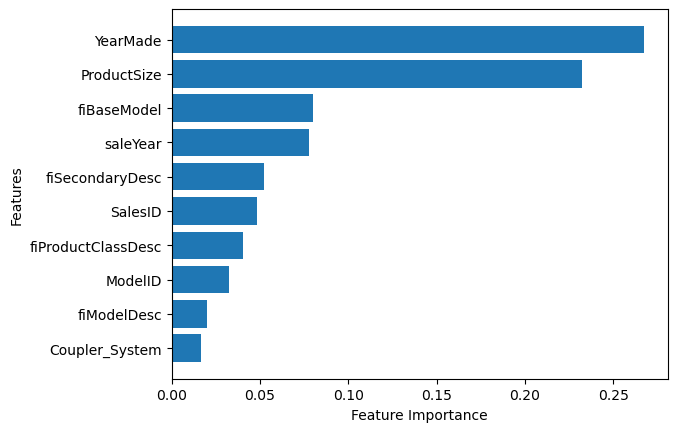

In [83]:
plot_features(X_train.columns, ideal_model.feature_importances_)